# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

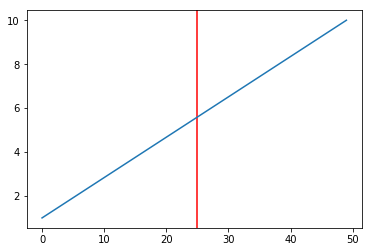

In [37]:
x = np.arange(0, 50) 
y = np.linspace(1, 10, 50)

plt.axvline(25, color='red')

plt.plot(x, y)

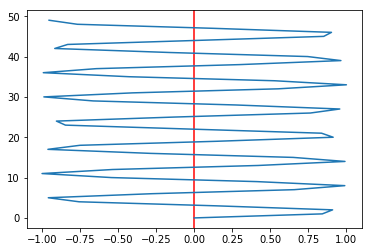

In [41]:
y = np.arange(0, 50) 
x = np.sin(y)

plt.axvline(0, color='red')

plt.plot(x, y)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Functions are defined as beings maps from each point in the domain to a unique point in the range. The vertical line test is a quick - and visual - means of determining whether a particular point in the domain maps to more than one point in the range. Hence, like in the graph immediately above, when a vertical line intersects more than one point in a curve, it means the input at that point maps to more than one output hence not statisfying the definition of a function. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

In [127]:
one = [(1,2), (3,2), (1,3)]
two = [(1,3), (2,3), (6,7)]
three = [(9,4), (2,1), (9,6)]
four = [(6,2), (8,3), (6,4)]
five = [(2,6), (2,7), (2,4)]

relations = [one, two, three, four, five]

In [130]:
def is_function(mapping):
    domain = [x for x,y in mapping]
    return len(set(domain)) == len(domain)

In [131]:
[is_function(relation) for relation in relations]

[False, True, False, False, False]

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

### Answers
- The domain of the function $m$ has dimension $3$, and its range has dimension $3$
- The domain of the function $n$ has dimension $4$, and its range has dimension $2$

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

### Answers
Of course! Consider the following trivial function which projects every point on number line into a subspace of a 4 dimensional space:
$$
f(x) = (x, x, x, x)
$$

However it should be mentioned that the aforementioned function, as I think all functions from lower to higher dimensions will, maps into a subspace of the 4 dimensioned space at hand.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [238]:
def p(x1, x2):
    return np.matrix(
        [[  x1 + 3*x2],
         [2*x2 -   x1]]
    )

def q(x1, x2, x3):
    return np.matrix(
        [[4*x1 +   x2 +   x3],
         [2*x2 -   x1 + 3*x3],
         [5*x1 - 2*x3 +   x2]]
    )

In [239]:
a = p(*[1, 0])
a

matrix([[ 1],
        [-1]])

In [240]:
b = p(*[0, 1])
b

matrix([[3],
        [2]])

In [241]:
# p Transformation Matrix
two_dim_trans_mat = np.concatenate([a.T, b.T]).T

two_dim_trans_mat

matrix([[ 1,  3],
        [-1,  2]])

In [242]:
np.array_equal(np.matmul(two_dim_trans_mat, [[3], [4]]), p(3, 4))

True

In [261]:
c = q(*[1, 0, 0])
c

matrix([[ 4],
        [-1],
        [ 5]])

In [262]:
d = q(*[0, 1, 0])
d

matrix([[1],
        [2],
        [1]])

In [263]:
e = q(*[0, 0, 1])
e

matrix([[ 1],
        [ 3],
        [-2]])

In [264]:
# q Transformation Matrix
three_dim_trans_mat = np.concatenate([c.T, d.T, e.T]).T

three_dim_trans_mat

matrix([[ 4,  1,  1],
        [-1,  2,  3],
        [ 5,  1, -2]])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [268]:
x = np.random.randint(100)
y = np.random.randint(100)

np.array_equal(np.matmul(two_dim_trans_mat, [[x], [y]]), p(x, y))

True

In [269]:
x = np.random.randint(100)
y = np.random.randint(100)
z = np.random.randint(100)

np.array_equal(np.matmul(three_dim_trans_mat, [[x], [y], [z]]), q(x, y, z))

True

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are particular members of vector spaces which remain stationary through transformations of the vector space, despite this these transformations can scale the eigenvectors at hand, the degree to which the eigenvector is scaled is called the eigenvalue. Eigenvectors also form the generating group for the vector space at hand. Another way to think about eigenvectors is to look for things whose properties are enhanced or reduced but don't fundamentally change, when the enviornment they exist in changes.

In [100]:
A = np.matrix(
    [[2, 2],
     [-4, 8]]
)

V = np.array([[1, 1]])
W = np.array([[2, 1]])

def potential_eigenvalue_of(matrix, vector):
    matrix = np.matrix(matrix)
    vector = np.array(vector)
    
    inner_product = matrix.dot(vector.T)
    return np.linalg.norm(inner_product)/np.linalg.norm(vector.T)

def is_eigenvalue(matrix, vector, scalar):
    matrix = np.matrix(matrix)
    vector = np.array(vector)
    
    return (matrix.dot(vector.T)) == (scalar*vector)

In [102]:
potential_eigenvalue_of(A, W), potential_eigenvalue_of(A, V)

(2.6832815729997477, 4.0)

In [108]:
A.dot(W.T)

matrix([[6],
        [0]])

In [106]:
2.6832815729997477 * W

array([[ 5.36656315,  2.68328157]])

In [105]:
is_eigenvalue(A, W, potential_eigenvalue_of(A, W))

matrix([[False, False],
        [False, False]], dtype=bool)

In [104]:
is_eigenvalue(A, V, potential_eigenvalue_of(A, V))

matrix([[ True,  True],
        [ True,  True]], dtype=bool)

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The obvious initial challenges are conceptual; it's hard to visualize or infer from a projection of an nth dimensional space onto a 2 dimensional screen. Tertiary concerns can come from storage or computational runtime concerns, it's not cheap to handle large amounts of data hence the demand for GPUs. It's also worth mentioning that in high-dimensional spaces the relative positions of each data point becomes streched and will exist closer and closer to the edges of whatever blob the data points in your set make up. That stretching is a problem because it makes measures of distance less effective, which means it becomes hard to meaningully determine - for example - the variance of a high dimensional dataset.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have at least 5x as many observations as parameters.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [275]:
import sklearn

In [279]:
iris_data_url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
iris = pd.read_csv(iris_data_url)
pca = sklearn.decomposition.PCA(n_components=2)

In [280]:
model = pca.fit(iris.drop(columns='species'))
model.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

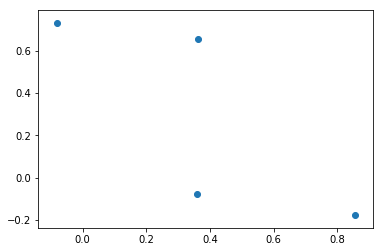

In [281]:
plt.scatter(*model.components_)

In [296]:
numerical_iris = iris.drop(columns='species').values
means = np.mean(numerical_iris.T, axis=1)
centered = numerical_iris - means
covariance = np.cov(centered.T)
values, vecs = np.linalg.eig(covariance)
principles = vecs.T.dot(centered.T)

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)